In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from pickle import TRUE
from sklearn.preprocessing import StandardScaler

In [2]:
#loading our dataset
nyc_prop=pd.read_csv('property_analysis_data_new_york_city.csv')

In [3]:
nyc_prop

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
#Doing a .head function
nyc_prop.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#.Shape
nyc_prop.shape

(48895, 16)

In [6]:
#.Descibe function
nyc_prop.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


the . describe function gives a summary statistic analysis on the numeric features in our dataset.The count outputs the total number of entries in each feature, it can be observed that all the features have complete entries except the review per month feature. this shows that there are some missing values in that feature and will be worked on.The mean gives the average of each feature whereas the standard deviation gives us an estimation of how far or close the values in our features are to mean this then enable us to identify any outliers in each feature. the min give the minimum number of each feature while the 25th,50th and 75th percentile give us the percentage ranges of each feature. The max gives us the maximum value of each feature .             

In [7]:
nyc_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
nyc_prop.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

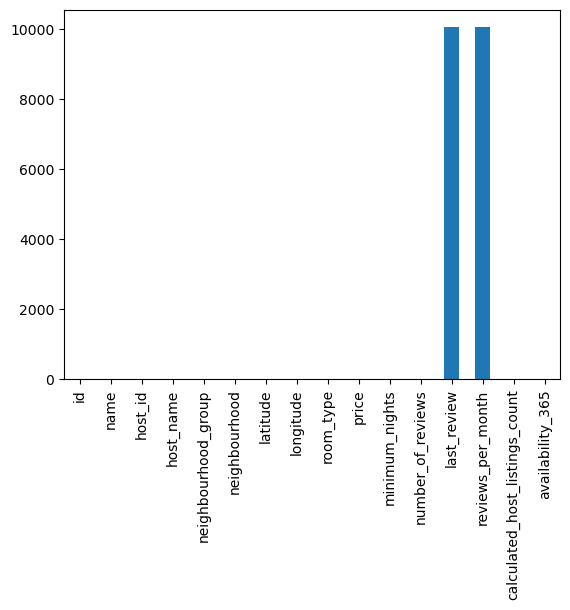

In [9]:
#visualizing the empty entries with a bar graph
nyc_prop.isnull().sum().plot(kind='bar')

Handling missing values in the dataset.
since it insights we are making from this dataset it will be best to keep all columns in order to be able to relate and get a better understanind of the the dataset.
HOST-NAME Feature
the host name contains the name of the people who will host those who book the appartment.Since there are 12 missing values in the host_name feature we can use the mode to fill in those missing values in the host-name feature.  

NAME Feature
With the Name feature; since it contains the names of the apartments i will be using the mode to fill in the missing values.The total missing value for name=16.

LAST_REVIEW & REVIEW PER MONTH
These features have the highest missing values accounting for almost 20% of the dataset. 
0 will be assigned to those empty values indicating that there were no reviews recorded for each of the feature.  
since it insight we want to make from these dataset we get to know the number of people who do make reviews,the type of rooms they would want to stay in,the kind of neighbourhood they would like to stay in and many more.         

In [10]:
#finding the most appearing host name 
host_mode=nyc_prop['host_name'].mode()
host_mode

0    Michael
Name: host_name, dtype: object

In [11]:
#using the most appearing host name to fill the empty values in the host_name feature
nyc_prop['host_name'].fillna(value='Michael',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12984\1952360761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_prop['host_name'].fillna(value='Michael',inplace=True)


In [12]:
#finding the appartment that appear the most 
appartment=nyc_prop['name'].mode()
appartment

0    Hillside Hotel
Name: name, dtype: object

In [13]:
#using  Hillside Hotel to fill the empty entries in the name feature
nyc_prop['name'].fillna('Hillside Hotel',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12984\2389047618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_prop['name'].fillna('Hillside Hotel',inplace=True)


In [14]:
#assigning 0 to all empty entries in last_review  to indicate that  a review was not made
nyc_prop['last_review'].fillna('0' ,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12984\2477987286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_prop['last_review'].fillna('0' ,inplace=True)


In [15]:
#assigning 0 to all empty entries in review per month  to indicate that  a a monthly review was not made
nyc_prop['reviews_per_month'].fillna('0' ,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12984\2103251022.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_prop['reviews_per_month'].fillna('0' ,inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12984\2103251022.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  nyc_prop['reviews_per_month'].fillna('0' ,inplace=True)


In [16]:
nyc_prop.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
#checking for duplicated data
nyc_prop.duplicated().sum()

0

Use case 1: Manhattan neighbourhood

In [18]:
#Selecting data where the neighborhood group is Manhattan
man=nyc_prop[nyc_prop['neighbourhood_group']=='Manhattan']

In [19]:
man.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [20]:
#number of Rows
len(man)

21661

In [21]:
#number of Columns
len(man.columns)

16

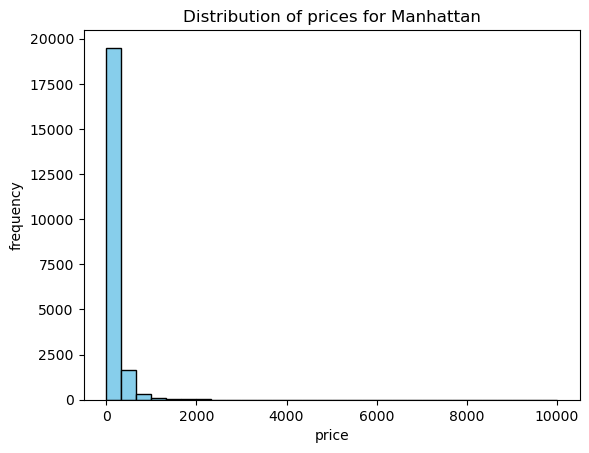

In [22]:
#histogram to visualize the distribution of prices for the Manhattan properties
plt.hist(man['price'], bins=30,color='skyblue',edgecolor='black')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Distribution of prices for Manhattan')
plt.show()


Per the Above Visualization we can see that majourity of the prices of properties in Manhattan are below $200 and hence more booking of   

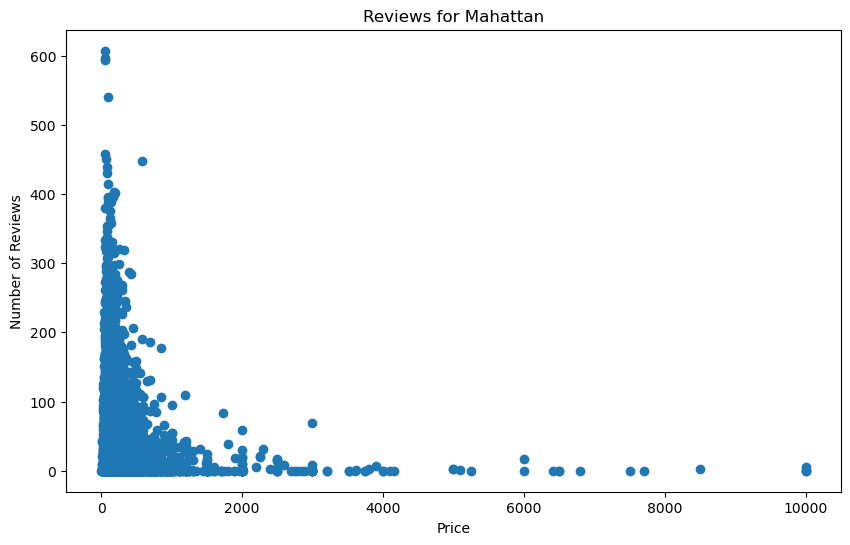

In [23]:
# creating a scatter plot to visualize the number of reviews over the price
plt.figure(figsize=(10,6))
plt.scatter(man['price'],man['number_of_reviews'])
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Reviews for Mahattan')
plt.show()

from the above we realized that properties with lower prices had more reviews than that the ones with higher prices.  

In [24]:
#Identifying the top 10 neighbourhoods from the Manhattan properties 
topt=man['neighbourhood'].value_counts().head(10)
topt

neighbourhood
Harlem                2658
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Midtown               1545
East Harlem           1117
Chelsea               1113
Lower East Side        911
Washington Heights     899
Name: count, dtype: int64

In [25]:
#Selecting the subset of Manhattan corresponding to top 10 
sub = man[man['neighbourhood'].isin(topt.index)]
sub

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,0,0,1,176
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,0,0,1,31
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0,6,2


In [26]:
#number of rows
len(sub)

15823

In [27]:
#number of column
len(sub.columns)

16

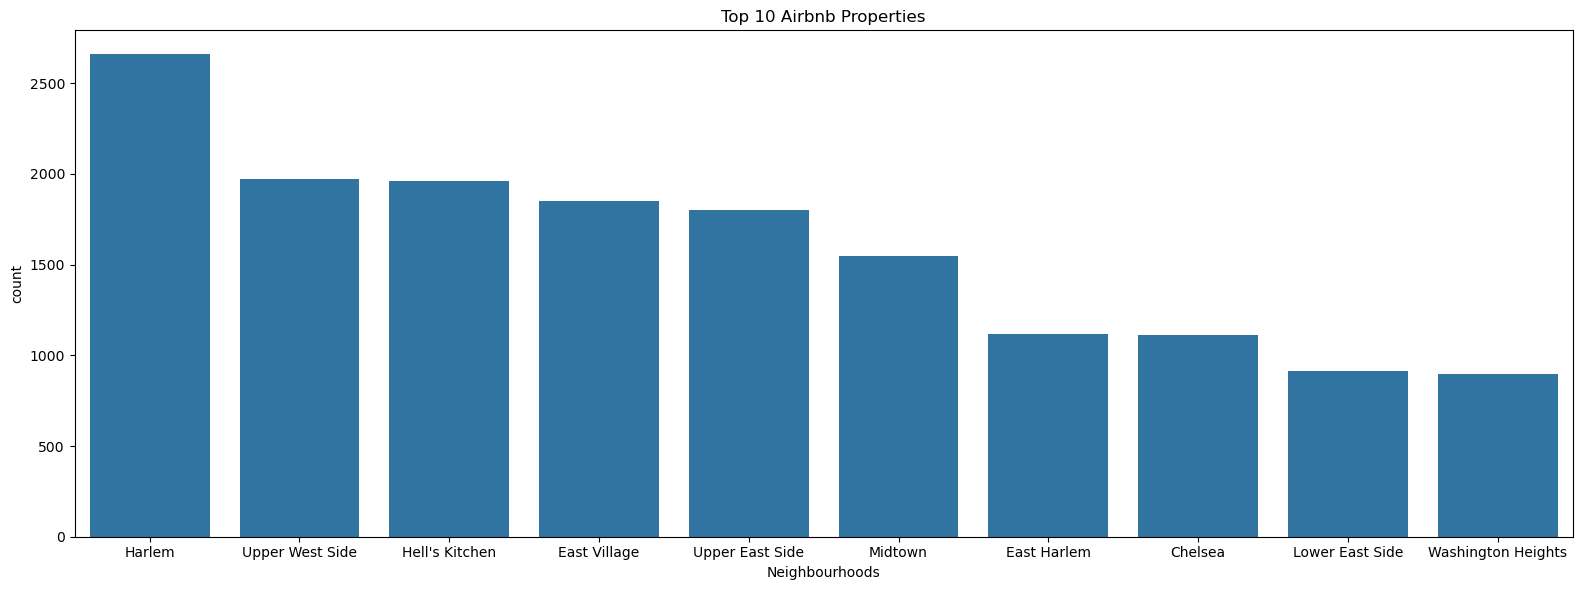

In [28]:
#count plot to visualize the number of Airbnb properties
plt.figure(figsize=(16,6))
sns.barplot(x=topt.index,y=topt.values)
plt.xlabel('Neighbourhoods')
plt.ylabel('count')
plt.title('Top 10 Airbnb Properties')
plt.tight_layout()
plt.show()

Use case 2: Queens neighbourhood

In [29]:
#Selecting data where the neighborhood group is Queens
queen=nyc_prop[nyc_prop['neighbourhood_group']=='Queens']
queen.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.74771,-73.94740,Private room,130,3,248,2019-07-01,2.25,1,215
77,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75038,-73.90334,Private room,70,30,25,2019-05-31,0.22,1,324
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
161,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.74559,-73.92313,Private room,79,30,28,2019-04-12,0.26,1,126
181,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,10,2019-05-12,0.11,5,365


In [30]:
#number of rows
len(queen)

5666

In [31]:
#number of column
len(queen.columns)

16

In [32]:
queen['price'].max()

10000

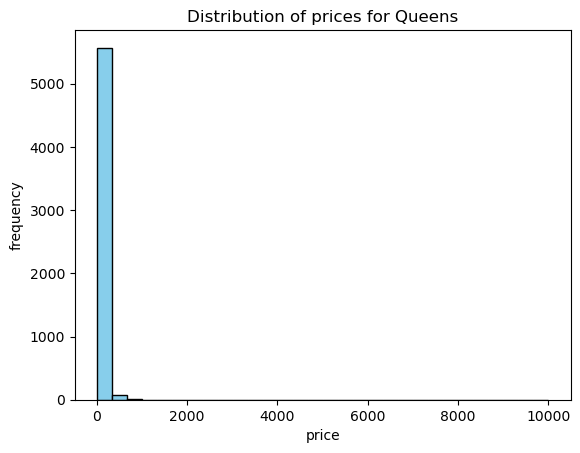

In [33]:
#histogram to visualize the distribution of prices for properties in Queens
plt.hist(queen['price'], bins=30,color='skyblue',edgecolor='black')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Distribution of prices for Queens')
plt.show()

Per the above output we realize that customers who book properties in Queens prefer houses with cheaper prices than houses with higher prices.  

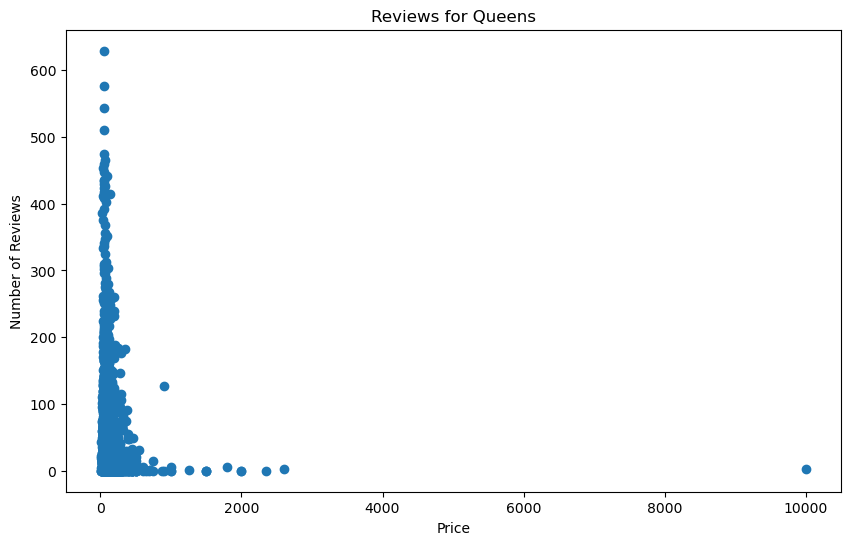

In [34]:
# creating a scatter plot to visualize the number of reviews over the price
plt.figure(figsize=(10,6))
plt.scatter(queen['price'],queen['number_of_reviews'])
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Reviews for Queens')
plt.show()

per the above visualization we realize that the are more reviews on properties with prices less than $1000  

In [35]:
#Identifying the top 5 neighbourhoods from Queens  properties 
top5=queen['neighbourhood'].value_counts().head(5)
top5

neighbourhood
Astoria             900
Long Island City    537
Flushing            426
Ridgewood           423
Sunnyside           363
Name: count, dtype: int64

In [36]:
#Selecting the subset of Queens corresponding to top 5 
sub5 = queen[queen['neighbourhood'].isin(top5.index)]
sub5

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.74771,-73.94740,Private room,130,3,248,2019-07-01,2.25,1,215
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
161,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.74559,-73.92313,Private room,79,30,28,2019-04-12,0.26,1,126
181,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,10,2019-05-12,0.11,5,365
200,53470,Clean and convenient 2BR apartment,204539,Mark,Queens,Ridgewood,40.70234,-73.89816,Private room,140,7,6,2015-10-08,0.06,5,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48817,36447683,2B2B/3 beds entire place in luxury building,24680832,Angela,Queens,Long Island City,40.74754,-73.94194,Entire home/apt,180,3,0,0,0,1,13
48822,36448708,Entire 3 Bedroom Astoria Apartment,183211776,Rafael,Queens,Astoria,40.76491,-73.90959,Entire home/apt,169,1,0,0,0,4,28
48841,36453030,Astoria Luxury Studio Aprtment near Broadway,8655014,Anton,Queens,Astoria,40.76267,-73.92610,Entire home/apt,210,7,0,0,0,1,12
48858,36458668,"2beds Private Room Step to LGA, CitiFiled, Mid...",217463199,Marvy,Queens,Flushing,40.74387,-73.82556,Private room,68,3,0,0,0,4,362


In [37]:
#number of rows
len(sub5)

2649

In [38]:
#number of columns
len(sub5.columns)

16

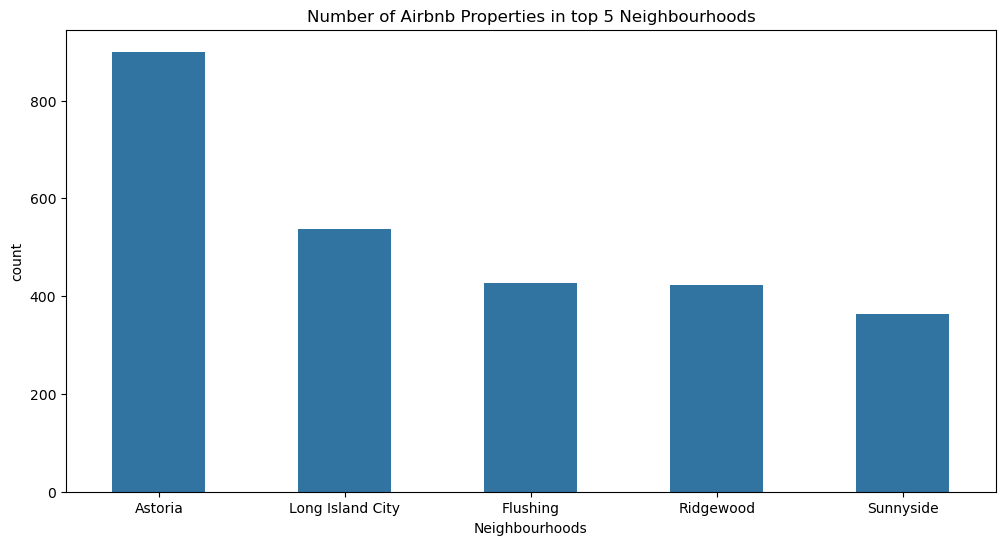

In [39]:
#count plot to visualize the number of Airbnb properties
plt.figure(figsize=(12,6))
sns.barplot(x=top5.index,y=top5.values ,width=0.5)
plt.xlabel('Neighbourhoods')
plt.ylabel('count')
plt.title('Number of Airbnb Properties in top 5 Neighbourhoods')

plt.show()

Use case 3: Brooklyn neighbourhood

In [40]:
#Selecting data where the neighborhood group is Brooklyn
brk=nyc_prop[nyc_prop['neighbourhood_group']=='Brooklyn']
brk.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.4,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.2,1,46


In [41]:
#number of rows
len(brk)

20104

In [42]:
len(brk.columns)

16

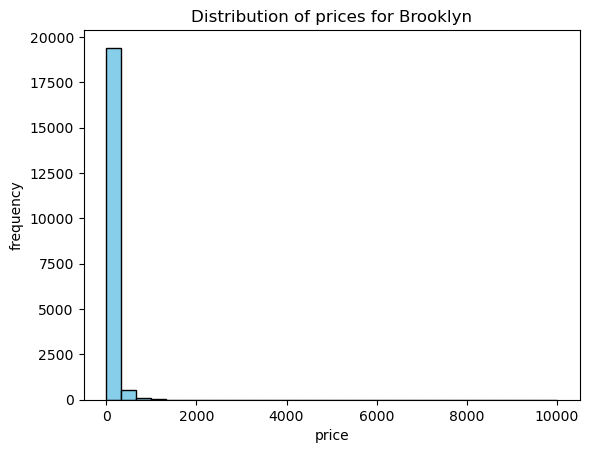

In [43]:
#histogram to visualize the distribution of prices for properties in Brooklyn
plt.hist(brk['price'], bins=30,color='skyblue',edgecolor='black')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Distribution of prices for Brooklyn')
plt.show()

Per the above visualization properties with lower prices are booked more than properties with higher prices  

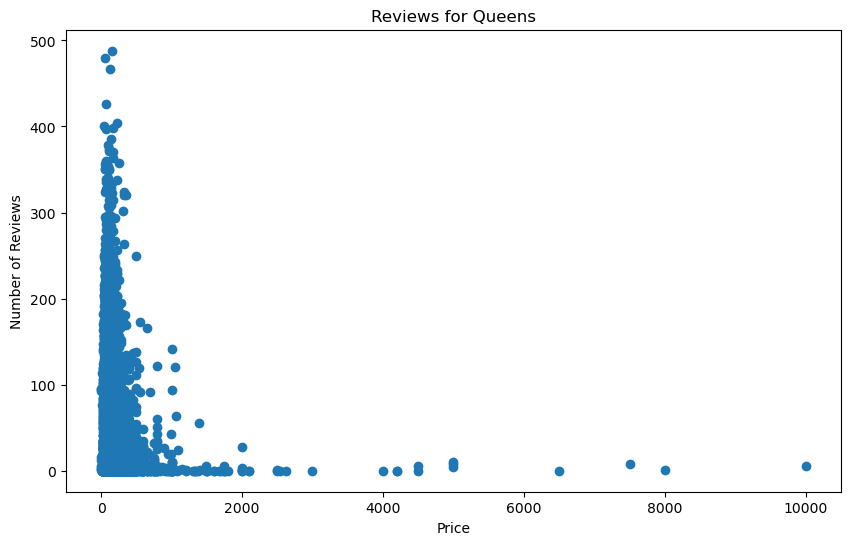

In [44]:
# creating a scatter plot to visualize the number of reviews over the price for brooklyn
plt.figure(figsize=(10,6))
plt.scatter(brk['price'],brk['number_of_reviews'])
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Reviews for Queens')
plt.show()

Per the above visualization we realize that houses with cheaper prices upto 500 reviews whereas houses with higher prices have lower reviews

In [45]:
#Identifying the top 20 neighbourhoods from Brooklyn  properties 
top2=queen['neighbourhood'].value_counts().head(20)
top2

neighbourhood
Astoria                900
Long Island City       537
Flushing               426
Ridgewood              423
Sunnyside              363
Ditmars Steinway       309
Elmhurst               237
Woodside               235
Jamaica                231
Jackson Heights        186
East Elmhurst          185
Forest Hills           144
Maspeth                110
Rego Park              106
Richmond Hill           94
Woodhaven               88
Springfield Gardens     85
Arverne                 77
St. Albans              76
Corona                  64
Name: count, dtype: int64

In [46]:
#Selecting the subset of Brooklyn corresponding to top 20 
sub2 = brk[brk['neighbourhood'].isin(top2.index)]
sub2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [47]:
#number of rows
len(sub2)

0

In [48]:
len(sub2.columns)

16

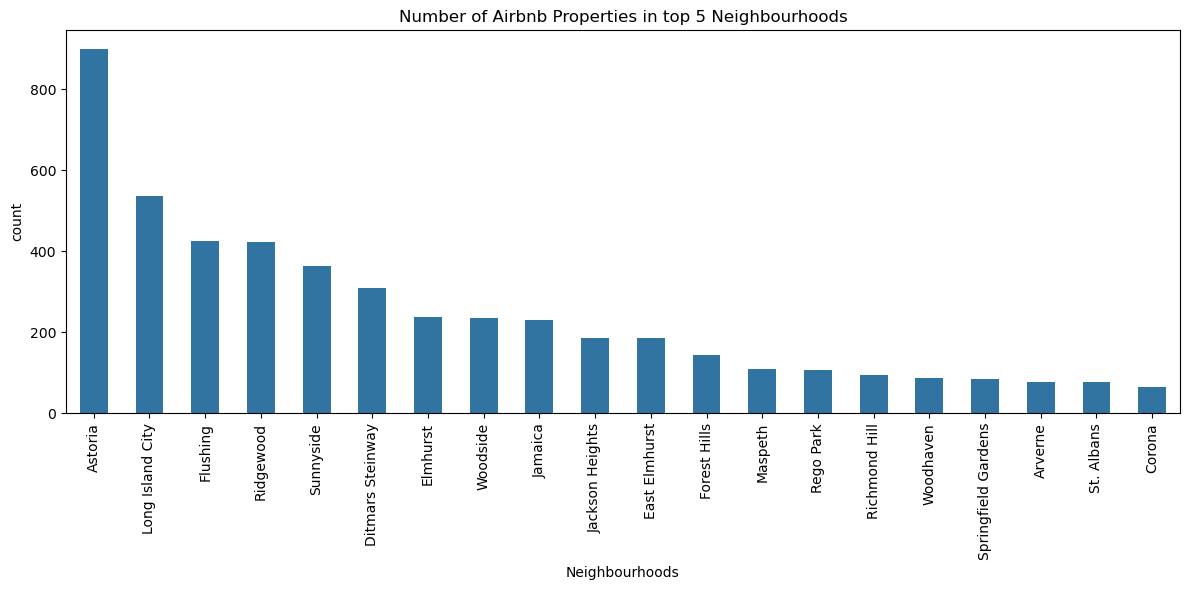

In [49]:
#count plot to visualize the number of Airbnb properties for brooklyn
plt.figure(figsize=(12,6))
sns.barplot(x=top2.index,y=top2.values,width=0.5)
plt.xlabel('Neighbourhoods')
plt.ylabel('count')
plt.title('Number of Airbnb Properties in top 5 Neighbourhoods')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()